In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import nltk
import re,string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

df = pd.read_csv("C:\\Users\\Admin\\Downloads\\twitter_data.csv")

print(df.shape)

df.head(5)

(24783, 7)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
df["labels"] = df['class'].map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
df = df[["tweet", "labels"]]

In [4]:
 def preprocess(text):
        test_list = text.split()
        text = ""
        for word in test_list:
            if word.endswith("ing"):
                word=word[:-3]
            text+=word
            text+=" "
        doc = nlp(text)
        filtered_tokens = []
        
        for token in doc:
            if token.is_stop or token.is_punct:
                continue
            filtered_tokens.append(token.lemma_)
            
        return " ".join(filtered_tokens)

In [5]:
df["tweet_new"] = df.tweet.apply(preprocess)

In [6]:
df.head()

,tweet,labels,tweet_new
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech,RT @mayasolovely woman complain clean house am...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech,RT @mleew17 boy dat cold tyga dwn bad cuffin d...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech,RT @UrKindOfBrand Dawg RT @80sbaby4life fuck b...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech,RT @C_G_Anderson @viva_base look like tranny
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech,RT @shenikaroberts shit hear true faker bitch ...


In [7]:
def clean(text):
    text = str (text). lower()
    text = re. sub('[.?]', '', text)
    text = re. sub('https?://\S+|www.\S+', '', text)
    text = re. sub('<.?>+', '', text)
    text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
    text = re. sub('\n', '', text)
    text = re. sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ". join(text)
    text = [stemmer. stem(word) for word in text. split(' ')]
    text=" ". join(text)
    return text

In [8]:
df["tweet_new"] = df.tweet_new.apply(clean)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = np. array(df["tweet_new"])
y = np. array(df["labels"])
cv = TfidfVectorizer()
X = cv.fit_transform(x)
df.head()

,tweet,labels,tweet_new
0,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate and Offensive Speech,rt mayasolov woman complain clean hous amp man...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Speech,rt mlee boy dat cold tyga dwn bad cuffin dat h...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Speech,rt urkindofbrand dawg rt babif fuck bitch star...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Speech,rt cganderson vivabas look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Speech,rt shenikarobert shit hear true faker bitch te...


Accuracy: 0.8838488812813302
F1 Score: 0.8783184916049428
Precision: 0.873852761706997
Recall: 0.8838488812813302
ROC AUC Score: 0.838090094328619
Confusion Matrix:
[[  98   47  320]
 [  35 1187  157]
 [ 193  198 5944]]


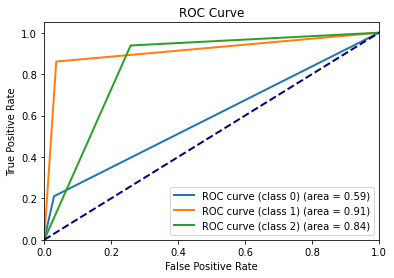

'#Predicting the outcome\ninp = "This is an example tweet that you want to classify."\ninp = preprocess(inp)\nprint(inp)\ninp = cv.transform([inp]).toarray()\nprint(model.predict(inp))'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Model building
model = DecisionTreeClassifier()
#Training the model
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''#Predicting the outcome
inp = "This is an example tweet that you want to classify."
inp = preprocess(inp)
print(inp)
inp = cv.transform([inp]).toarray()
print(model.predict(inp))'''

Accuracy: 0.7930064800097811
F1 Score: 0.7170429648431524


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.7757810756167034
Recall: 0.7930064800097811
ROC AUC Score: 0.8514520953423979
Confusion Matrix:
[[   0    1  464]
 [   0  154 1225]
 [   0    3 6332]]


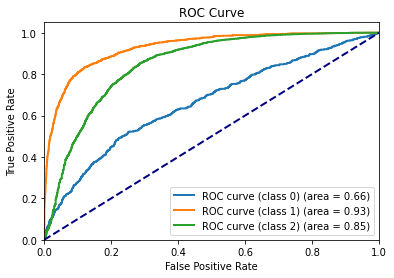

'#Predicting the outcome\ninp = "what are you doing"\ninp = preprocess(inp)\nprint(inp)\ninp = cv.transform([inp]).toarray()\nprint(model.predict(inp))'

In [12]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Model building
model = MultinomialNB()
#Training the model
model.fit(X_train,y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''#Predicting the outcome
inp = "what are you doing"
inp = preprocess(inp)
print(inp)
inp = cv.transform([inp]).toarray()
print(model.predict(inp))'''

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8941190854627705
F1 Score: 0.8777083878017186
Precision: 0.8790353357934655
Recall: 0.8941190854627705
ROC AUC Score: 0.9408795975106515
Confusion Matrix:
[[  62   46  357]
 [   1 1098  280]
 [  45  137 6153]]


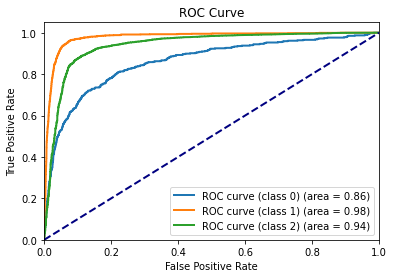

'#Predicting the outcome\ninp = "Get the hell out of here"\ninp = preprocess(inp)\nprint(inp)\ninp = cv.transform([inp]).toarray()\nprint(model1.predict(inp))'

In [13]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model1.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''#Predicting the outcome
inp = "Get the hell out of here"
inp = preprocess(inp)
print(inp)
inp = cv.transform([inp]).toarray()
print(model1.predict(inp))'''

Accuracy: 0.8927741777723438
F1 Score: 0.8735548291427462
Precision: 0.8755685222034076
Recall: 0.8927741777723438
ROC AUC Score: 0.9427594090730511
Confusion Matrix:
[[  41   37  387]
 [   2 1113  264]
 [  31  156 6148]]


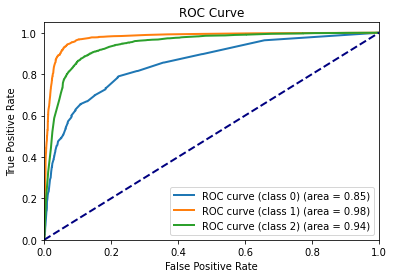

'#Predicting the outcome\ninp = "get that string"\ninp = preprocess(inp)\nprint(inp)\ninp = cv.transform([inp]).toarray()\nprint(model.predict(inp))'

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Model building
model = RandomForestClassifier()
#Training the model
model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''#Predicting the outcome
inp = "get that string"
inp = preprocess(inp)
print(inp)
inp = cv.transform([inp]).toarray()
print(model.predict(inp))'''

Accuracy: 0.8991319232179973
F1 Score: 0.8768423207276251
Precision: 0.8810209675212028
Recall: 0.8991319232179973
ROC AUC Score: 0.9419550472680973
Confusion Matrix:
[[  22   44  399]
 [   3 1167  209]
 [  14  156 6165]]


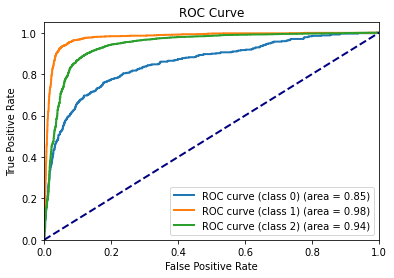

'#Predicting the outcome\ninp = "hello"\ninp = preprocess(inp)\nprint(inp)\ninp = cv.transform([inp]).toarray()\nprint(model.predict(inp))'

In [16]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Model building
model = SVC(probability=True)
#Training the model
model.fit(X_train,y_train)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''#Predicting the outcome
inp = "hello"
inp = preprocess(inp)
print(inp)
inp = cv.transform([inp]).toarray()
print(model.predict(inp))'''

Accuracy: 0.9064677833475975
F1 Score: 0.8960544995249181
Precision: 0.8977867449354999
Recall: 0.9064677833475975
ROC AUC Score: 0.9516047388865805
Confusion Matrix:
[[ 102   70  300]
 [   4 1292   78]
 [  65  248 6020]]


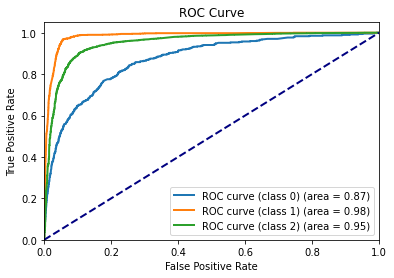

'# Predicting the outcome\ninp = "hi"\ninp = preprocess(inp)\nprint("Preprocessed input:", inp)\n\ninp_transformed = cv.transform([inp]).toarray()\nprint("Prediction:", label_encoder.inverse_transform(xgb_model.predict(inp_transformed)))\n\ninp_transformed = cv.transform([inp]).toarray()\nprint("Input transformed:", inp_transformed)\n\nprint("Prediction using XGBoost xgb_model:", xgb_xgb_model.predict(inp_transformed))'

In [17]:
from xgboost import XGBClassifier
# xgb_model building
xgb_model = XGBClassifier()

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the string labels into integer labels
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=42, stratify=y_encoded)

# Training the xgb_model
xgb_model.fit(X_train, y_train)

# Testing the xgb_model
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_xgb, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred_xgb, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_xgb, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = xgb_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

'''# Predicting the outcome
inp = "hi"
inp = preprocess(inp)
print("Preprocessed input:", inp)

inp_transformed = cv.transform([inp]).toarray()
print("Prediction:", label_encoder.inverse_transform(xgb_model.predict(inp_transformed)))

inp_transformed = cv.transform([inp]).toarray()
print("Input transformed:", inp_transformed)

print("Prediction using XGBoost xgb_model:", xgb_xgb_model.predict(inp_transformed))'''

Accuracy: 0.901210416921384
F1 Score: 0.8909333636857102
Precision: 0.8881102186095375
Recall: 0.901210416921384
ROC AUC Score: 0.9459807968599132
Confusion Matrix:
[[ 101   53  318]
 [  15 1211  148]
 [  83  191 6059]]


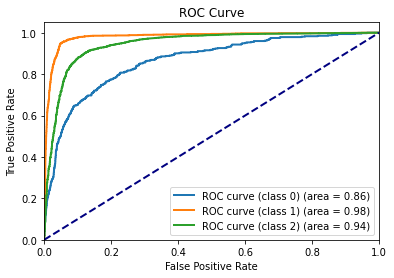

In [18]:
from sklearn.ensemble import VotingClassifier

# Initialize individual ensemble_models
dt_ensemble_model = DecisionTreeClassifier()
rf_ensemble_model = RandomForestClassifier()
svm_ensemble_model = SVC(kernel='linear', probability=True)  # Enable probability estimation for SVM

# Define the ensemble of ensemble_models
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_ensemble_model),
    ('random_forest', rf_ensemble_model),
    ('svm', svm_ensemble_model)
], voting='soft')  # Use soft voting for probability averaging

# Training the ensemble ensemble_model
ensemble_model.fit(X_train, y_train)

# Testing the ensemble ensemble_model
y_pred_ensemble = ensemble_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc

# Predict labels for the test set
y_pred_ensemble = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
print("F1 Score:", f1)

# Calculate precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
print("Recall:", recall)

# Calculate ROC AUC score
y_prob = ensemble_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
print("ROC AUC Score:", roc_auc)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:")
print(conf_matrix)

from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(np.unique(y_test))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Get input from the user
user_input = input("Enter the text you want to classify: ")

# Preprocess the user input
user_input_processed = preprocess(user_input)

print(user_input_processed)

# Transform the preprocessed input using the TF-IDF vectorizer
user_input_vectorized = cv.transform([user_input_processed])

# Make prediction using the ensemble model
prediction = ensemble_model.predict(user_input_vectorized)

# Print the predicted label
print("Predicted label:", prediction)

Enter the text you want to classify: hi bro
hi bro
Predicted label: [1]
